Part I: Explaratory Data Analysis of CSV Files


=== Analysis for Customers Dataset ===

Summary Statistics:
                            join_date          last_purchase_date  \
count                           10000                       10000   
unique                            NaN                         NaN   
top                               NaN                         NaN   
freq                              NaN                         NaN   
mean    2022-03-19 09:28:13.439999744  2023-04-25 18:26:12.480000   
min               2020-01-01 00:00:00         2020-01-26 00:00:00   
25%               2021-02-15 00:00:00         2022-09-19 00:00:00   
50%               2022-03-19 00:00:00         2023-08-04 00:00:00   
75%               2023-04-28 00:00:00         2024-02-11 00:00:00   
max               2024-05-31 00:00:00         2024-05-31 00:00:00   
std                               NaN                         NaN   

                age gender    location  
count   8991.000000   9467       10000  
unique          NaN      2  

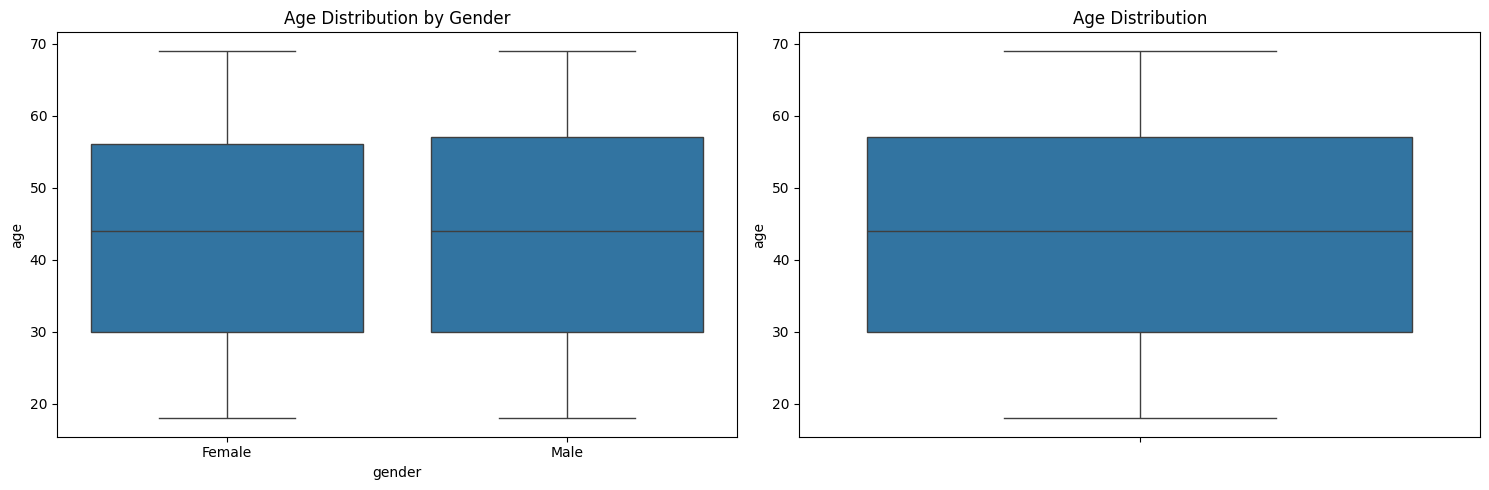

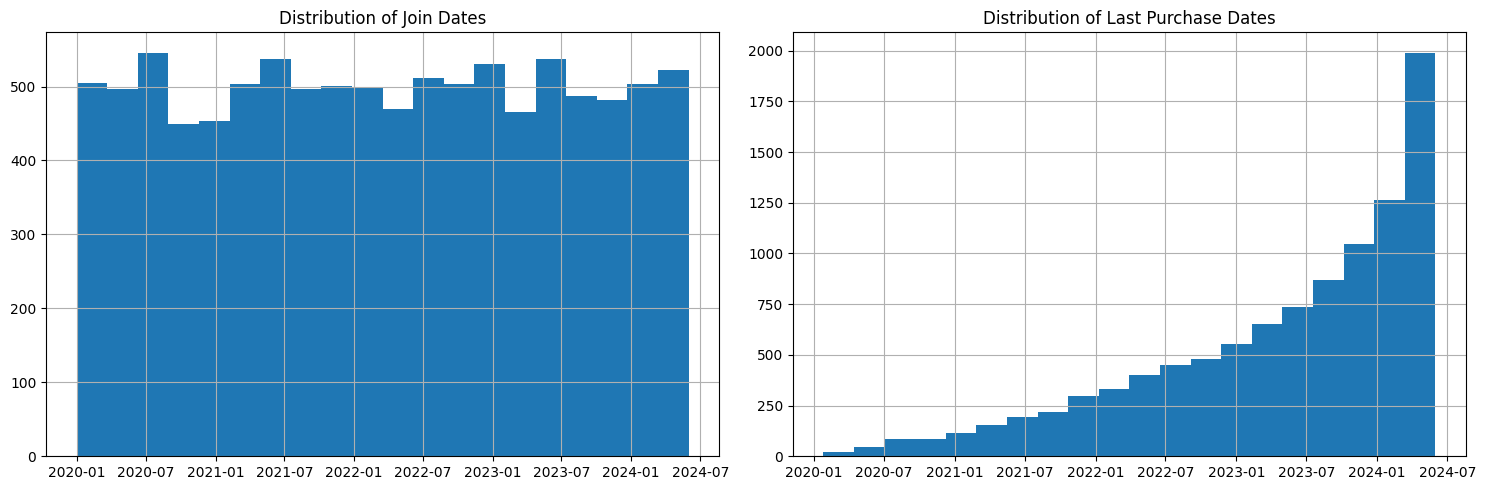


Null Values:
customer_id              0
join_date                0
last_purchase_date       0
age                   1009
gender                 533
location                 0
dtype: int64

=== Analysis for Transactions Dataset ===



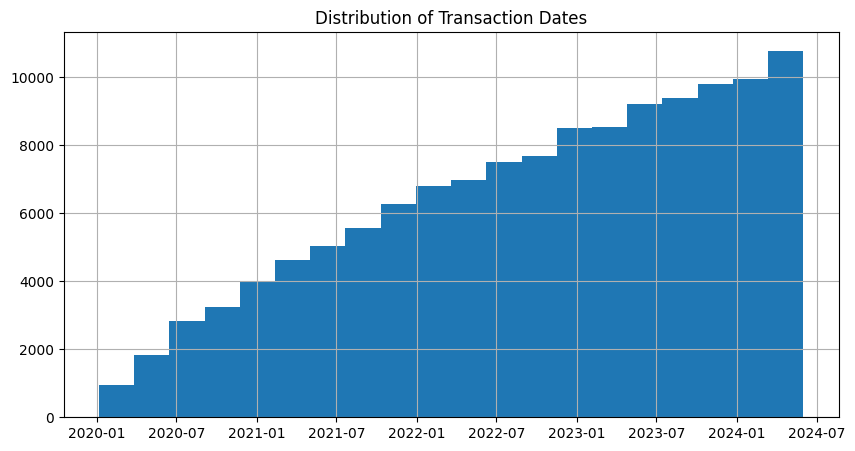

Summary Statistics:
        transaction_amount product_category
count        129545.000000           129545
unique                 NaN                3
top                    NaN      Electronics
freq                   NaN            43460
mean            597.287659              NaN
std             491.564174              NaN
min              10.020000              NaN
25%             228.320000              NaN
50%             438.380000              NaN
75%             846.980000              NaN
max            1999.990000              NaN

95th Percentile of Transaction Amount: 1707.46


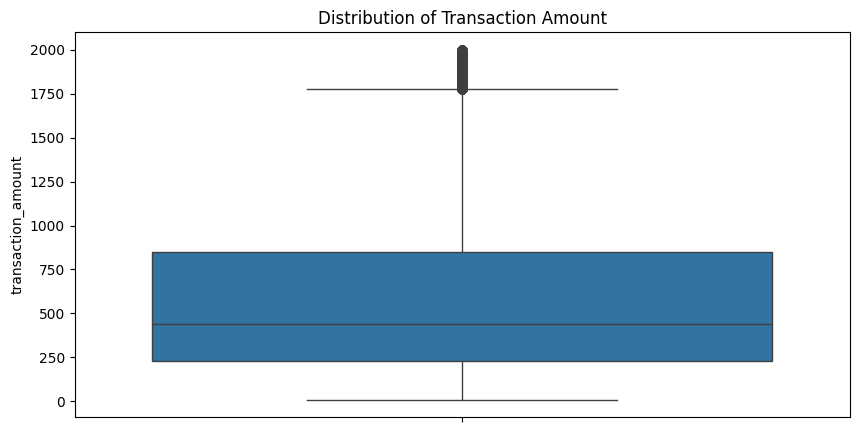

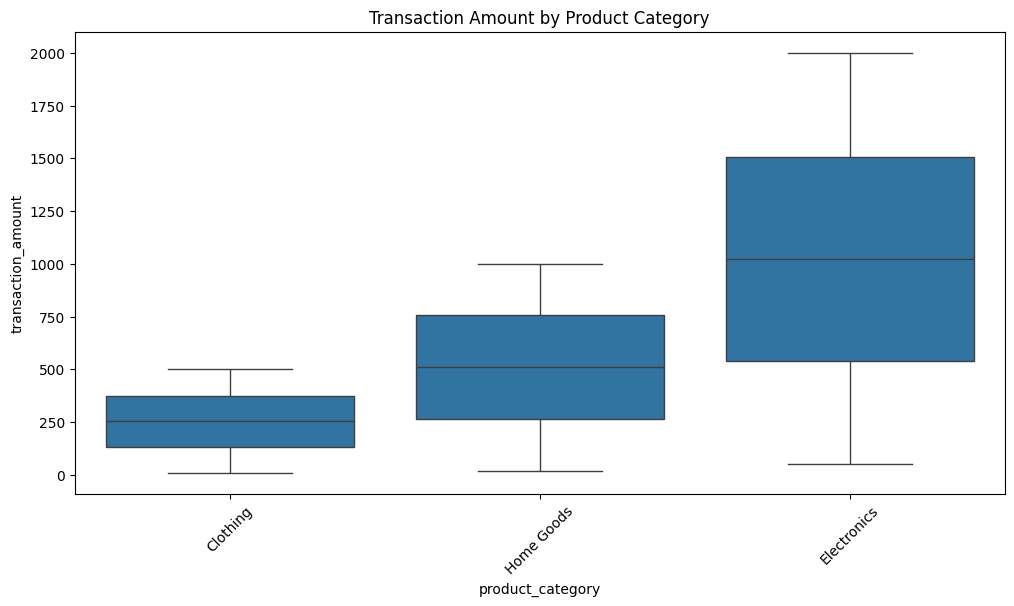


Null Values:
transaction_id        0
customer_id           0
transaction_date      0
transaction_amount    0
product_category      0
dtype: int64

=== Analysis for Engagements Dataset ===

Summary Statistics:
       number_of_site_visits  number_of_emails_opened  number_of_clicks
count           10000.000000             10000.000000      10000.000000
mean              100.111900                39.862100         19.725300
std               118.625052                46.511719         22.975083
min                 1.000000                 1.000000          1.000000
25%                15.000000                 6.000000          3.000000
50%                53.000000                22.000000         11.000000
75%               141.000000                57.000000         28.000000
max               711.000000               303.000000        142.000000

95th Percentiles:
number_of_site_visits: 363.00
number_of_emails_opened: 139.00
number_of_clicks: 69.05


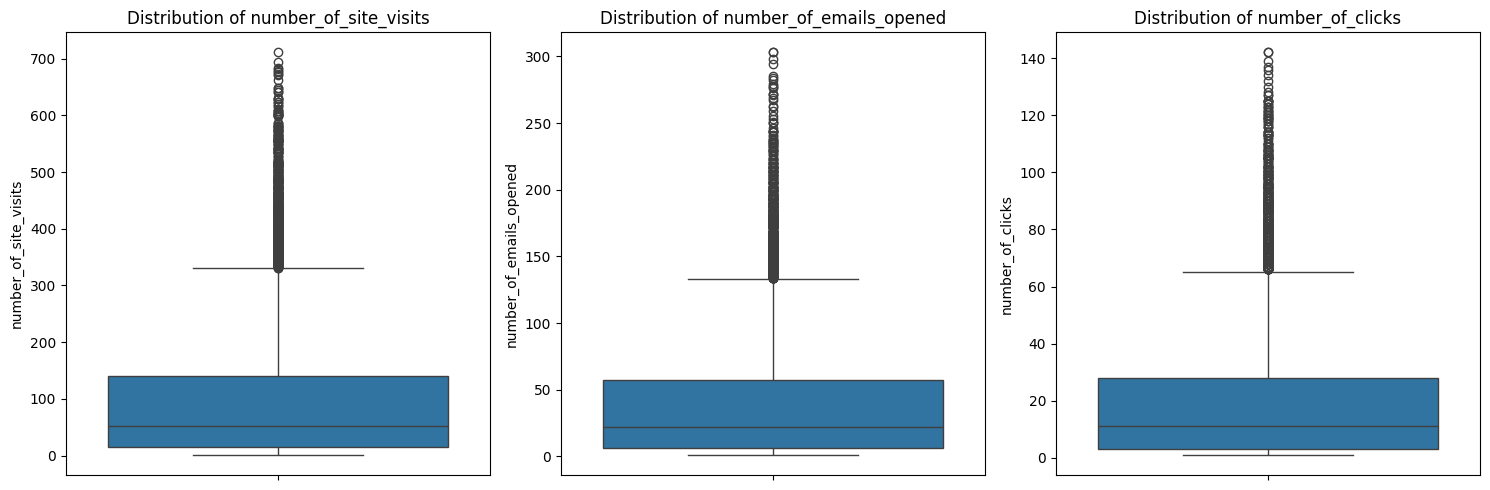


Null Values:
customer_id                0
number_of_site_visits      0
number_of_emails_opened    0
number_of_clicks           0
dtype: int64

=== Analysis for Marketing Dataset ===

Summary Statistics:
       response promotion_type                  campaign_date
count     25200          25200                          25200
unique        2              3                            NaN
top          No       Discount                            NaN
freq      12622           8430                            NaN
mean        NaN            NaN  2022-10-07 03:32:06.857142784
min         NaN            NaN            2020-01-06 00:00:00
25%         NaN            NaN            2021-12-12 00:00:00
50%         NaN            NaN            2022-12-01 00:00:00
75%         NaN            NaN            2023-09-15 00:00:00
max         NaN            NaN            2024-05-31 00:00:00


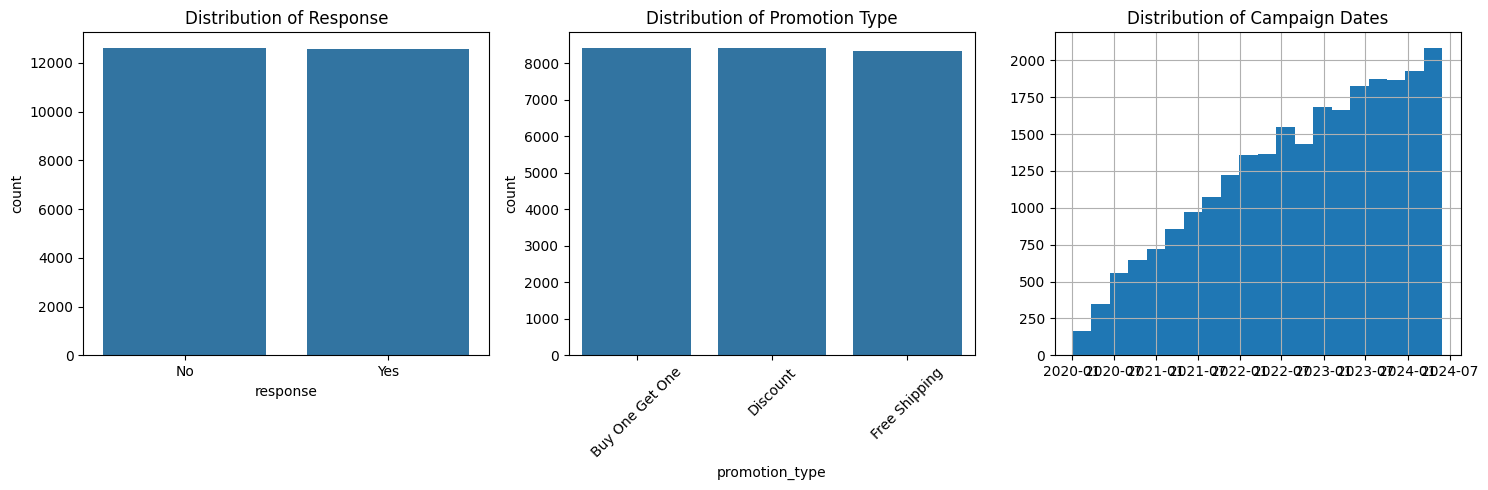


Null Values:
campaign_id       0
customer_id       0
response          0
promotion_type    0
campaign_date     0
dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_customers(url):
    print("\n=== Analysis for Customers Dataset ===\n")
    df = pd.read_csv(url)
    
    # Convert date columns to datetime
    df['join_date'] = pd.to_datetime(df['join_date'])
    df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
    
    # Summary stats for specified columns
    print("Summary Statistics:")
    print(df[['join_date', 'last_purchase_date', 'age', 'gender', 'location']].describe(include='all'))
    
    # Boxplots for age and gender
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(x='gender', y='age', data=df, ax=ax1)
    ax1.set_title('Age Distribution by Gender')
    sns.boxplot(y='age', data=df, ax=ax2)
    ax2.set_title('Age Distribution')
    plt.tight_layout()
    plt.show()
    
    # Distribution of date columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    df['join_date'].hist(ax=ax1, bins=20)
    ax1.set_title('Distribution of Join Dates')
    df['last_purchase_date'].hist(ax=ax2, bins=20)
    ax2.set_title('Distribution of Last Purchase Dates')
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_transactions(url):
    print("\n=== Analysis for Transactions Dataset ===\n")
    df = pd.read_csv(url)
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    
    # Distribution of transaction date
    plt.figure(figsize=(10, 5))
    df['transaction_date'].hist(bins=20)
    plt.title('Distribution of Transaction Dates')
    plt.show()
    
    # Summary stats for transaction amount and product category
    print("Summary Statistics:")
    print(df[['transaction_amount', 'product_category']].describe(include='all'))
    
    # 95th percentile for transaction amount
    print(f"\n95th Percentile of Transaction Amount: {df['transaction_amount'].quantile(0.95):.2f}")
    
    # Boxplot of transaction amount
    plt.figure(figsize=(10, 5))
    sns.boxplot(y='transaction_amount', data=df)
    plt.title('Distribution of Transaction Amount')
    plt.show()
    
    # Distribution of transaction amount by product category
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='product_category', y='transaction_amount', data=df)
    plt.title('Transaction Amount by Product Category')
    plt.xticks(rotation=45)
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_engagements(url):
    print("\n=== Analysis for Engagements Dataset ===\n")
    df = pd.read_csv(url)
    
    columns = ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']
    
    # Summary stats and 95th percentile
    print("Summary Statistics:")
    print(df[columns].describe())
    
    print("\n95th Percentiles:")
    for col in columns:
        print(f"{col}: {df[col].quantile(0.95):.2f}")
    
    # Boxplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, col in enumerate(columns):
        sns.boxplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

def analyze_marketing(url):
    print("\n=== Analysis for Marketing Dataset ===\n")
    df = pd.read_csv(url)
    
    columns = ['response', 'promotion_type', 'campaign_date']
    df['campaign_date'] = pd.to_datetime(df['campaign_date'])
    
    # Summary stats
    print("Summary Statistics:")
    print(df[columns].describe(include='all'))
    
    # Boxplots/distributions
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.countplot(x='response', data=df, ax=axes[0])
    axes[0].set_title('Distribution of Response')
    
    sns.countplot(x='promotion_type', data=df, ax=axes[1])
    axes[1].set_title('Distribution of Promotion Type')
    axes[1].tick_params(axis='x', rotation=45)
    
    df['campaign_date'].hist(ax=axes[2], bins=20)
    axes[2].set_title('Distribution of Campaign Dates')
    
    plt.tight_layout()
    plt.show()
    
    # Check for nulls
    print("\nNull Values:")
    print(df.isnull().sum())

# URLs of the datasets
urls = {
    'Customers': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv',
    'Transactions': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv',
    'Engagements': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv',
    'Marketing': 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv'
}

# Analyze each dataset
analyze_customers(urls['Customers'])
analyze_transactions(urls['Transactions'])
analyze_engagements(urls['Engagements'])
analyze_marketing(urls['Marketing'])

Part II: Cleaning & Combining the Data

In [15]:
import pandas as pd
import numpy as np

# Load the datasets
customers = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagements = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')
marketing = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')

# Clean customers_final file
customers = customers.dropna(subset=['gender'])
avg_age = int(customers['age'].mean()) 
customers['age'] = customers['age'].fillna(avg_age)
print(f"Remaining customers data: {len(customers)} rows")

# Clean engagement_final file
for col in ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']:
    p95 = engagements[col].quantile(0.95)
    engagements[col] = engagements[col].clip(upper=p95)
    print(f"95th percentile for {col}: {p95}")

# Clean marketing_final file
# Create dummy variables
marketing['responded_to_Buy_One_Get_One'] = ((marketing['promotion_type'] == 'Buy One Get One') & (marketing['response'] == 'Yes')).astype(int)
marketing['responded_to_Discount'] = ((marketing['promotion_type'] == 'Discount') & (marketing['response'] == 'Yes')).astype(int)
marketing['responded_to_Free_Shipping'] = ((marketing['promotion_type'] == 'Free Shipping') & (marketing['response'] == 'Yes')).astype(int)

# Create new columns for response dates
marketing['Buy_One_Get_One_response_date'] = np.where(marketing['responded_to_Buy_One_Get_One'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)
marketing['Discount_response_date'] = np.where(marketing['responded_to_Discount'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)
marketing['Free_Shipping_response_date'] = np.where(marketing['responded_to_Free_Shipping'] == 1, pd.to_datetime(marketing['campaign_date']), pd.NaT)

# Drop specified columns
marketing = marketing.drop(columns=['response', 'promotion_type', 'campaign_date', 'campaign_id'])

# Create Cleaned_Customers
cleaned_customers = customers.merge(marketing, on='customer_id', how='left')
cleaned_customers = cleaned_customers.merge(engagements, on='customer_id', how='left')

# Ensure date columns are in datetime format
date_columns = ['join_date', 'last_purchase_date', 'Buy_One_Get_One_response_date', 'Discount_response_date', 'Free_Shipping_response_date']
for col in date_columns:
    cleaned_customers[col] = pd.to_datetime(cleaned_customers[col])

# Group by customer_id and aggregate
cleaned_customers = cleaned_customers.groupby('customer_id').agg({
    'join_date': 'first',
    'last_purchase_date': 'first',
    'age': 'first',
    'gender': 'first',
    'location': 'first',
    'responded_to_Buy_One_Get_One': 'sum',
    'responded_to_Discount': 'sum',
    'responded_to_Free_Shipping': 'sum',
    'Buy_One_Get_One_response_date': 'max',
    'Discount_response_date': 'max',
    'Free_Shipping_response_date': 'max',
    'number_of_site_visits': 'first',
    'number_of_emails_opened': 'first',
    'number_of_clicks': 'first'
}).reset_index()

# Convert datetime columns to string format
for col in date_columns:
    cleaned_customers[col] = cleaned_customers[col].dt.strftime('%Y-%m-%d')

# Clean transactions_final file
# Filter out customers that are filtered out in Customers_Final
transactions = transactions[transactions['customer_id'].isin(customers['customer_id'])]

# Replace high outliers with 95th percentile
p95_transaction = transactions['transaction_amount'].quantile(0.95)
transactions['transaction_amount'] = transactions['transaction_amount'].clip(upper=p95_transaction)
print(f"95th percentile for transaction_amount: {p95_transaction}")

# Drop transaction_id
transactions = transactions.drop(columns=['transaction_id'])

# Ensure transaction_date is in the correct format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date']).dt.strftime('%Y-%m-%d')

# Save the cleaned datasets
cleaned_customers.to_csv(r'C:\Users\Numan\Desktop\Cleaned_Customers.csv', index=False)
transactions.to_csv(r'C:\Users\Numan\Desktop\Cleaned_Transactions.csv', index=False)

print("\nCleaned datasets have been saved to:")
print(r"C:\Users\Numan\Desktop\Cleaned_Customers.csv")
print(r"C:\Users\Numan\Desktop\Cleaned_Transactions.csv")

Remaining customers data: 9467 rows
95th percentile for number_of_site_visits: 363.0
95th percentile for number_of_emails_opened: 139.0
95th percentile for number_of_clicks: 69.04999999999927
95th percentile for transaction_amount: 1706.63

Cleaned datasets have been saved to:
C:\Users\Numan\Desktop\Cleaned_Customers.csv
C:\Users\Numan\Desktop\Cleaned_Transactions.csv
